This project analyses  Netflix user database. It explores a dataset featuring User ID, Subscription Type, Monthly Revenue, Join Date, Last Payment Date, Country, Age, Gender, Device, and Plan Duration. The objective is to highlight valuable insights into user behaviors, preferences, and trends.


# Access Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("netflix_userbase.csv")
print(data.head())

   User ID Subscription Type  Monthly Revenue   Join Date Last Payment Date  \
0        1             Basic               10  15/01/2022        10/06/2023   
1        2           Premium               15  05/09/2021        22/06/2023   
2        3          Standard               12  28/02/2023        27/06/2023   
3        4          Standard               12  10/07/2022        26/06/2023   
4        5             Basic               10  01/05/2023        28/06/2023   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


In [21]:
data.info

<bound method DataFrame.info of       User ID Subscription Type  Monthly Revenue   Join Date  \
0           1             Basic               10  15/01/2022   
1           2           Premium               15  05/09/2021   
2           3          Standard               12  28/02/2023   
3           4          Standard               12  10/07/2022   
4           5             Basic               10  01/05/2023   
...       ...               ...              ...         ...   
2495     2496           Premium               14  25/07/2022   
2496     2497             Basic               15  04/08/2022   
2497     2498          Standard               12  09/08/2022   
2498     2499          Standard               13  12/08/2022   
2499     2500             Basic               15  13/08/2022   

     Last Payment Date         Country  Age  Gender      Device Plan Duration  
0           10/06/2023   United States   28    Male  Smartphone       1 Month  
1           22/06/2023          Canada 

In [23]:
data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [25]:
unique_values = data.apply(pd.Series.unique)
print(unique_values)

User ID              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Subscription Type                           [Basic, Premium, Standard]
Monthly Revenue                               [10, 15, 12, 13, 11, 14]
Join Date            [15/01/2022, 05/09/2021, 28/02/2023, 10/07/202...
Last Payment Date    [10/06/2023, 22/06/2023, 27/06/2023, 26/06/202...
Country              [United States, Canada, United Kingdom, Austra...
Age                  [28, 35, 42, 51, 33, 29, 46, 39, 37, 44, 31, 4...
Gender                                                  [Male, Female]
Device                          [Smartphone, Tablet, Smart TV, Laptop]
Plan Duration                                                [1 Month]
dtype: object


In [27]:
data.duplicated().sum()

0

In [29]:
data.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

# Visualize Variables

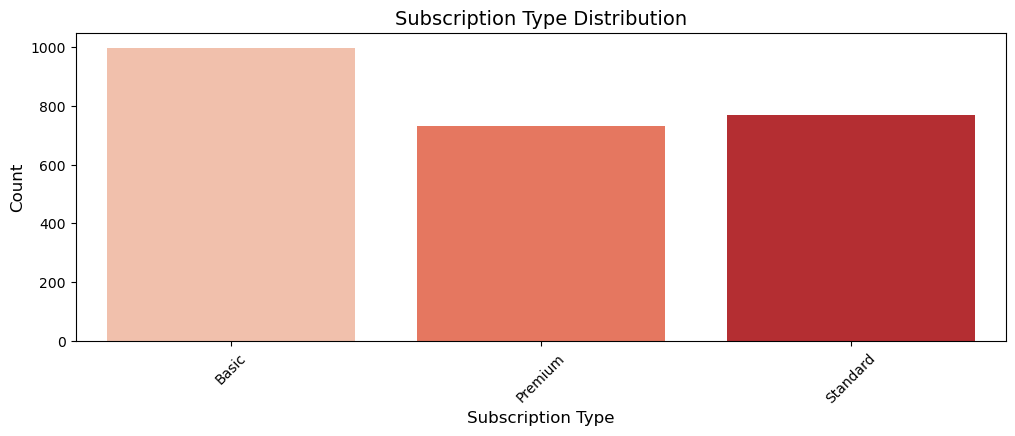

<Figure size 640x480 with 0 Axes>

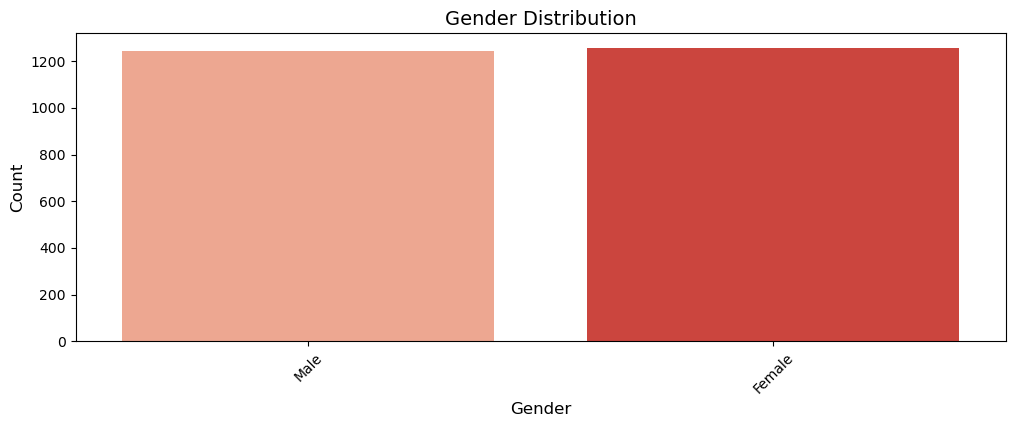

<Figure size 640x480 with 0 Axes>

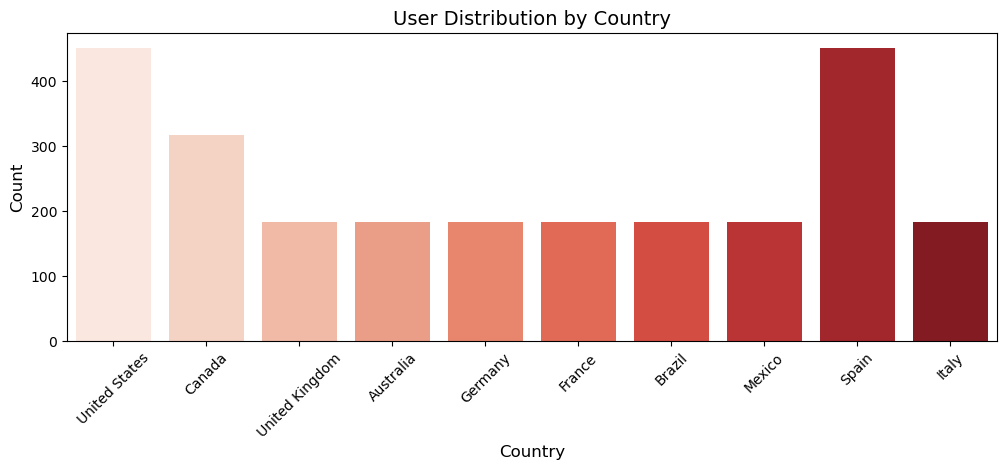

<Figure size 640x480 with 0 Axes>

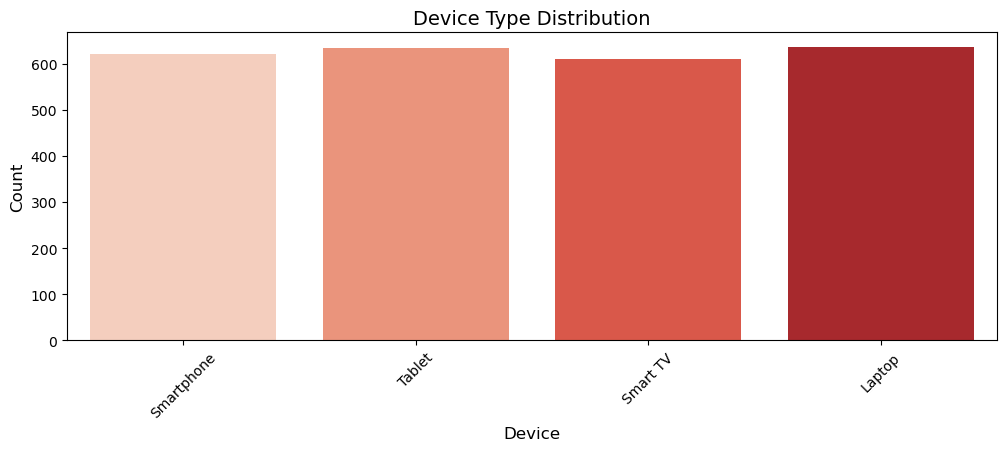

<Figure size 640x480 with 0 Axes>

In [52]:
#create bar charts to visualise variables

def plot_count(column, title):
    plt.figure(figsize=(12, 4))
    sns.countplot(x=column, data=data, palette='Reds')
    plt.title(title, fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()
    plt.clf()


plot_count('Subscription Type', "Subscription Type Distribution")
plot_count('Gender', "Gender Distribution")
plot_count('Country', "User Distribution by Country")  
plot_count( 'Device', "Device Type Distribution")
    

# Subscription Type across countries


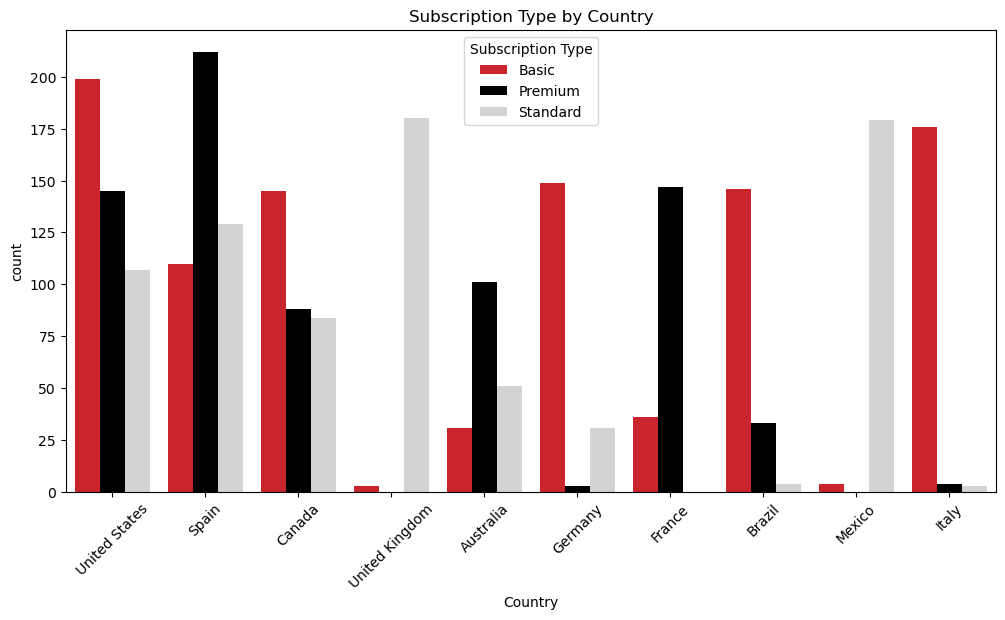

<Figure size 640x480 with 0 Axes>

In [52]:
# Define a custom palette
custom_palette = ["#E50914", "#000000", "#D3D3D3"] 

plt.figure (figsize= (12,6))
sns.countplot(x='Country', data=data, order=data['Country'].value_counts().index, hue='Subscription Type', palette= custom_palette)
plt.title('Subscription Type by Country')
plt.xticks(rotation=45)
plt.show()
plt.clf()

In [104]:
subscription_country = data.pivot_table( index='Country', columns= 'Subscription Type', values= 'User ID', aggfunc='count', fill_value = 0)

In [106]:
subscription_country 

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,31,101,51
Brazil,146,33,4
Canada,145,88,84
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179
Spain,110,212,129
United Kingdom,3,0,180


# Gender Distribution across countries



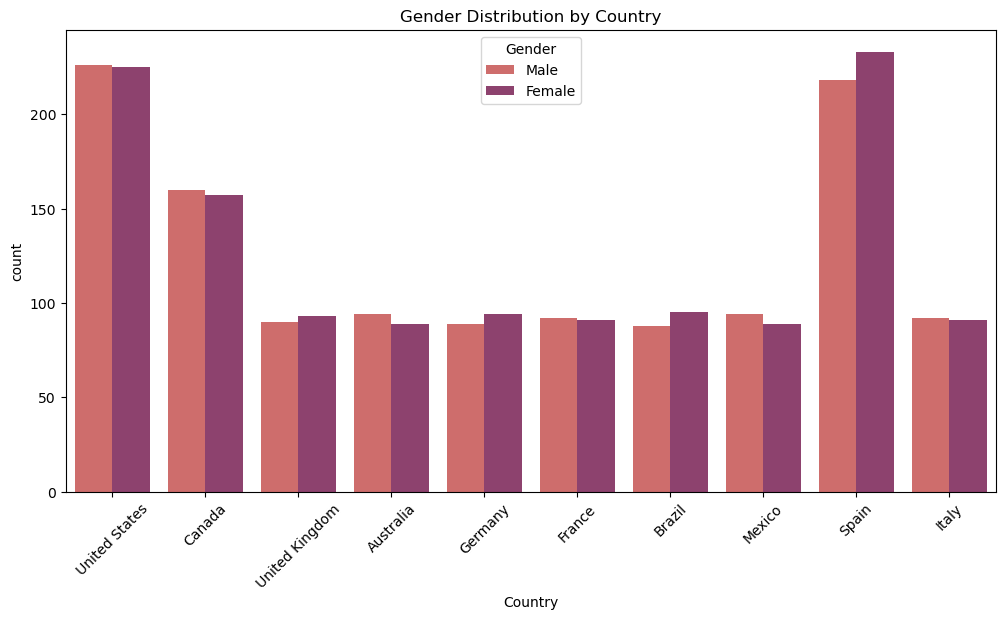

<Figure size 640x480 with 0 Axes>

In [56]:
plt.figure (figsize= (12,6))
sns.countplot(x='Country', data=data, hue='Gender', palette ='flare')
plt.title('Gender Distribution by Country')
plt.xticks(rotation=45)
plt.show()
plt.clf()

# Age Distribution of Users

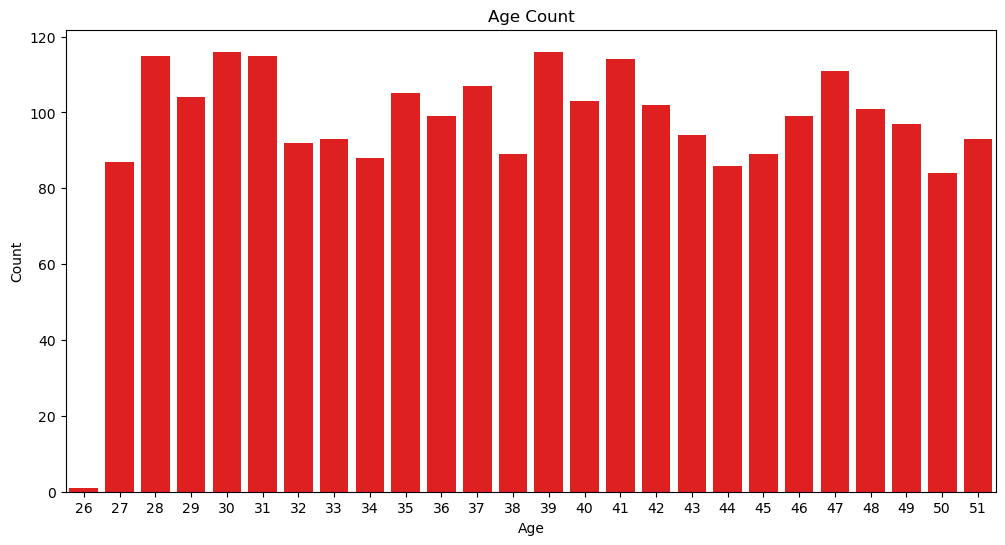

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure (figsize=(12,6))
sns.countplot(x='Age', data=data, order=data['Age'].value_counts().sort_index().index, color='#FF0000')
plt.title('Age Count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
plt.clf()

# Calculate Subscription Duration


In [20]:
# Convert 'Join Date' and 'Last Payment Date' to datetime
data['Join Date'] = pd.to_datetime(data['Join Date'], format='%d/%m/%Y')
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'], format='%d/%m/%Y')



In [22]:
# Calculate the duration in days between 'Last Payment Date' and 'Join Date'
data['Duration'] = (data['Last Payment Date'] - data['Join Date']).dt.days

# Convert the duration to months by dividing by 30 and using numpy's ceil for rounding up
data['Duration Months'] = np.ceil(data['Duration'] / 30).astype(int)


In [24]:
print(data.head(5))


   User ID Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
0        1             Basic               10 2022-01-15        2023-06-10   
1        2           Premium               15 2021-09-05        2023-06-22   
2        3          Standard               12 2023-02-28        2023-06-27   
3        4          Standard               12 2022-07-10        2023-06-26   
4        5             Basic               10 2023-05-01        2023-06-28   

          Country  Age  Gender      Device Plan Duration  Duration  \
0   United States   28    Male  Smartphone       1 Month       511   
1          Canada   35  Female      Tablet       1 Month       655   
2  United Kingdom   42    Male    Smart TV       1 Month       119   
3       Australia   51  Female      Laptop       1 Month       351   
4         Germany   33    Male  Smartphone       1 Month        58   

   Duration Months  
0               18  
1               22  
2                4  
3               12  
4    

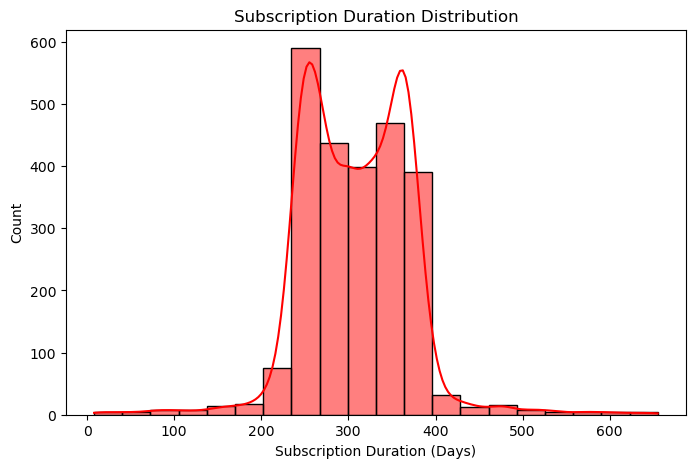

<Figure size 640x480 with 0 Axes>

In [26]:
# Create the histogram
plt.figure(figsize=(8, 5))
sns.histplot(data["Duration"], bins=20, kde=True, color="red")

# Add title and labels
plt.title("Subscription Duration Distribution")
plt.xlabel("Subscription Duration (Days)")
plt.ylabel("Count")

# Show the plot
plt.show()
plt.clf()

# Customer Lifetime Value (LTV

In this section we answer the following questions:
How valuable is each user to Netflix over time?

Which subscription plans have the most loyal customers?

These can give insights to whether Netflix should invest in customer retention or acquisition?

In [29]:
## Total Lifetime Value (LTV) estimates the total revenue Netflix expects to earn from all users over their lifetime

#calculate Lifetime Value (LTV) by multiplying monthly revenue and monthly duration

data['LTV'] = data ['Monthly Revenue'] * data['Duration Months']


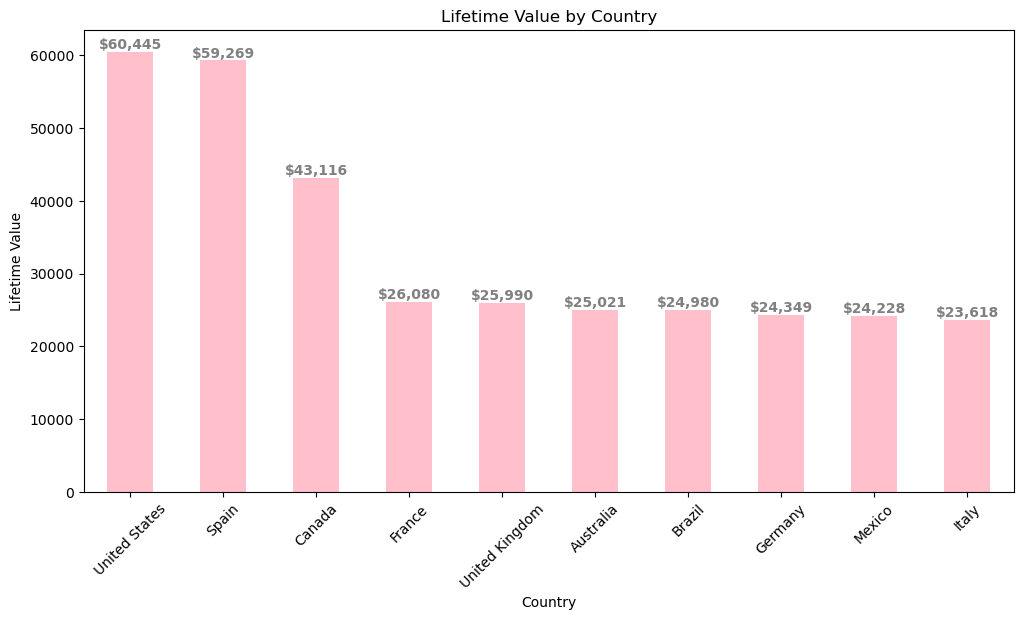

<Figure size 640x480 with 0 Axes>

In [49]:
# Visualize total LTV by country
ltv_by_country_sum = data.groupby('Country')['LTV'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 6))

ax=ltv_by_country_sum.plot(kind='bar', color='pink')
# Annotate each bar
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}",  
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position (x, y)
                ha='center', va='bottom', fontsize=10, color='grey', fontweight='bold')
    
plt.title('Lifetime Value by Country')  
plt.xlabel('Country')
plt.ylabel('Lifetime Value')
plt.xticks(rotation=45)
plt.show()

plt.clf()


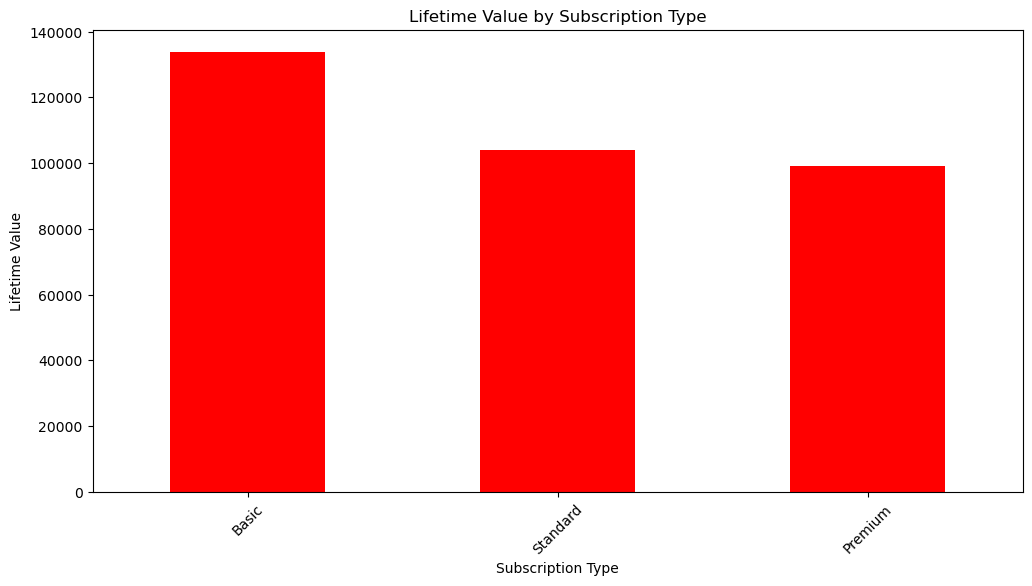

<Figure size 640x480 with 0 Axes>

In [77]:
# Visualize total LTV by Subscription type
ltv_by_subscription_sum = data.groupby('Subscription Type')['LTV'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
ltv_by_subscription_sum.plot(kind='bar', color='Red')
plt.title('Lifetime Value by Subscription Type')  
plt.xlabel('Subscription Type')
plt.ylabel('Lifetime Value')
plt.xticks(rotation=45)
plt.show()

plt.clf()

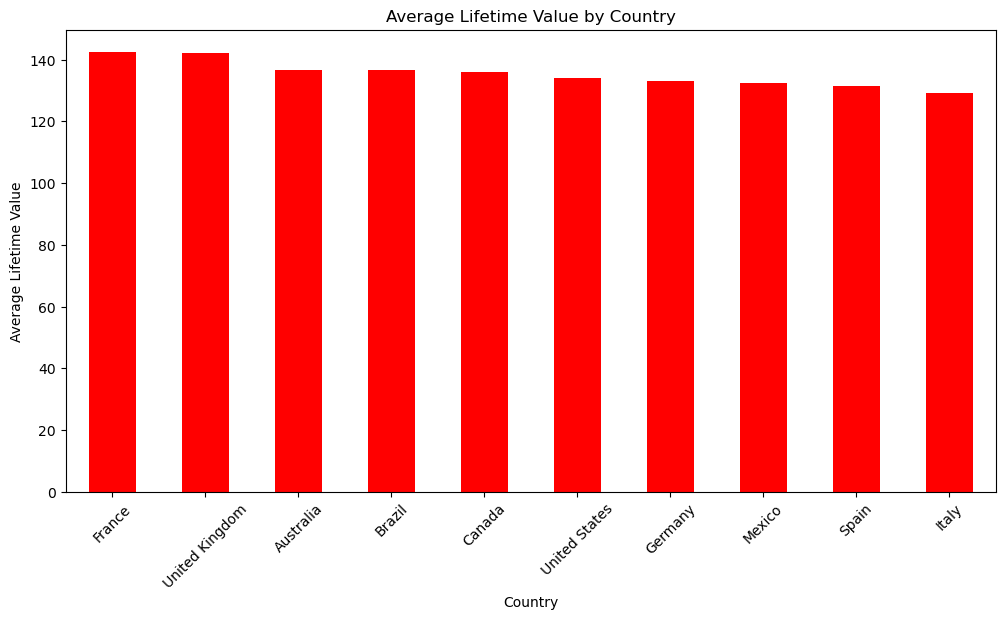

<Figure size 640x480 with 0 Axes>

In [55]:

##Average Lifetime Value (LTV) measures how much revenue a single customer generates over their lifetime.

# Visualize Average LTV by country
ltv_by_country_avg = data.groupby('Country')['LTV'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ltv_by_country_avg.plot(kind='bar', color='red')
plt.title('Average Lifetime Value by Country')  
plt.xlabel('Country')
plt.ylabel('Average Lifetime Value')
plt.xticks(rotation=45)
plt.show()

plt.clf()


Total Lifetime Value (LTV) estimates the total revenue Netflix expects to earn from all users over their lifetime. The analysis shows that the United States and Spain have the highest Total LTV, indicating that these countries contribute the most revenue over time.

Average Lifetime Value (LTV) measures how much revenue a single customer generates over their lifetime. The analysis shows that France and the United Kingdom have the highest Average LTV, meaning customers in these countries tend to spend more on Netflix subscriptions compared to other regions.

Additionally, the Basic plan has the highest number of subscribers, suggesting that most users prefer a lower-cost subscription option.

# Revenue Distribution by Device Type

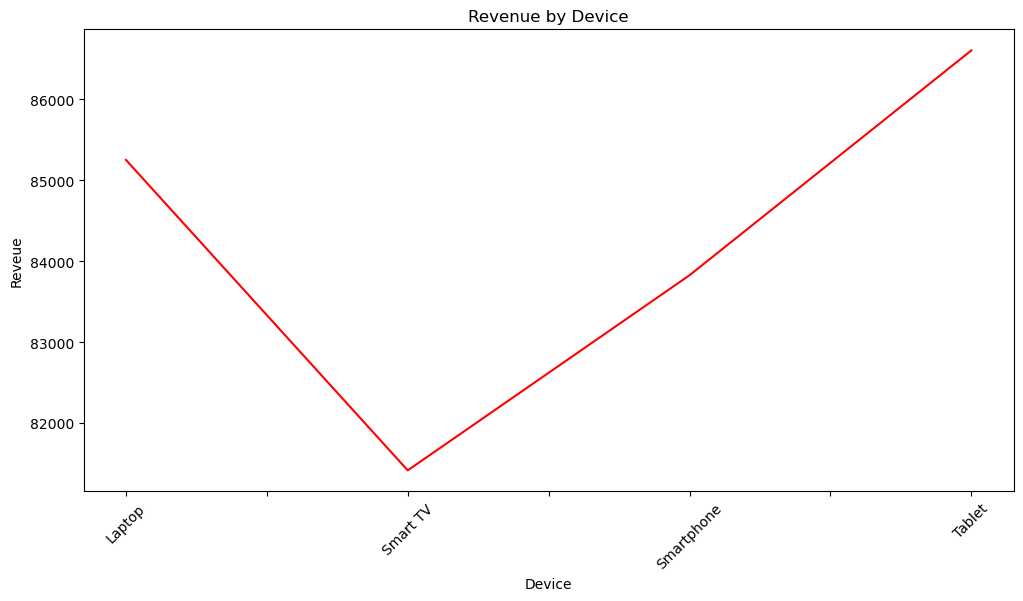

<Figure size 640x480 with 0 Axes>

In [93]:
Revenue_by_Device = data.groupby('Device')['LTV'].sum()


plt.figure(figsize=(12, 6))
Revenue_by_Device.plot(kind='line', color='red')
plt.title('Revenue by Device')  
plt.xlabel('Device')
plt.ylabel('Reveue')
plt.xticks(rotation=45)
plt.show()

plt.clf()


# Gender Distribution by Device 

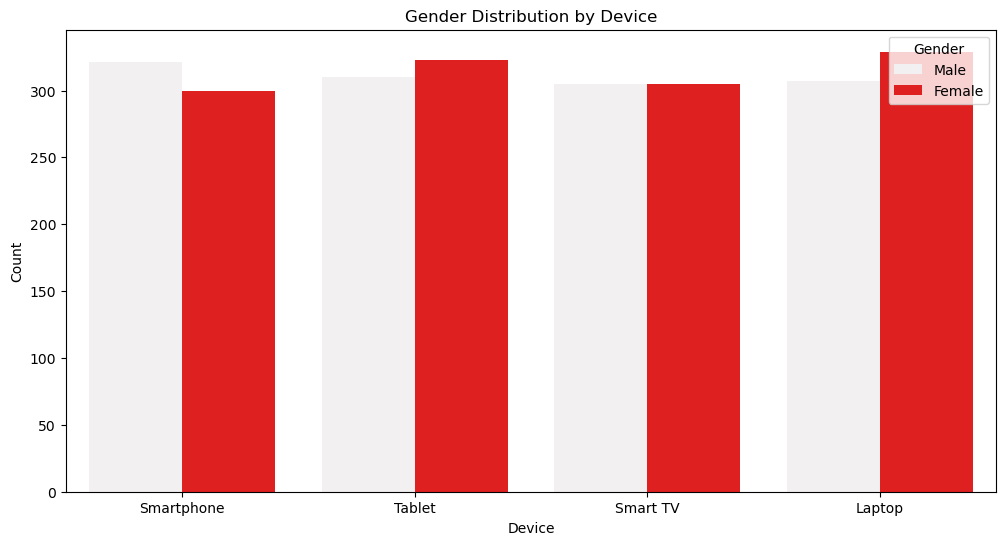

<Figure size 640x480 with 0 Axes>

In [116]:
plt.figure (figsize=(12,6))
sns.countplot(x='Device', hue= 'Gender', data=data, color='#FF0000')
plt.title('Gender Distribution by Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()
plt.clf()
plt.clf()

# Key Insights 


💡 Subscription Types:

-The Basic plan is the most popular subscription type but there is a fairly even distribution across all plans. Netflix may want to explore strategies  to upsell Basic users to higher-tier plans.

-Subscription type based on counry shows that most Premium users  are in Spain and Standard users in the Uk.

💡 Subscription Duration:

-Netflix has strong retention, with most users staying for nearly a year.

-A portion of users cancel within 1-2 months, suggesting an opportunity for better engagement strategies.
Long-term subscribers (>1 year) are very fewer in number, meaning retention beyond the first year is challenging.

-Analyzing short-term cancellations can help improve retention strategies.

💡 Gender & Age Distribution: 

-Gender distribution is nearly equal in Netflix’s user base.

-Most users are in their late 30s to early 40s,  Netflix may benefit from content tailored to this age group.

💡 Life time value:

-The United States and Spain has the highest total Life Time Value, meaning a large portion of Netflix revenue comes from these users.

-France and the United Kingdom has the highest Average Life Time Value, due to higher-tier subscriptions, most users are premium and standard subscribers. This may also suggest stronger retention.

-Italy has the lowest revenue, with most users on basic subscription, this may indicate potential churn issues.


# Conclusion

Netflix retains most users for nearly a year, but early cancellations (1–2 months) highlight an opportunity for better engagement strategies. While the Basic plan is most popular, Premium and Standard plans drive higher revenue, especially in France and the UK.
From a lifetime value (LTV) perspective, the U.S. and Spain contribute the highest total revenue, while France and the UK lead in Average LTV due to higher-tier subscriptions. Italy has the lowest LTV, indicating potential churn risk due to a high proportion of Basic plan users. 

# Recommendations 

-Upsell Basic Plan Users – Promote higher-tier plans in key markets like Spain and the UK.
- Improve Retention – Address early churn with personalized engagement strategies.
- Maximize Revenue Growth – Expand Premium Plan promotions in Canada & Australia and apply France/UK retention strategies elsewhere.
- Reduce Churn in Italy – Investigate low LTV and introduce localized engagement strategies.